In [1]:
from vertex import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = dataLoader()

data.dropna(inplace=True)

embeddings = data.iloc[:, 1:].values

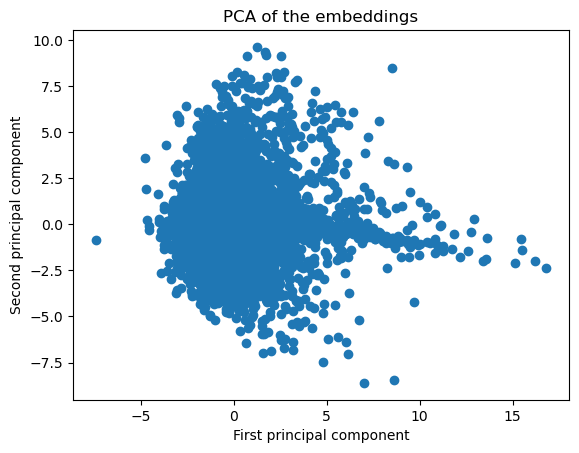

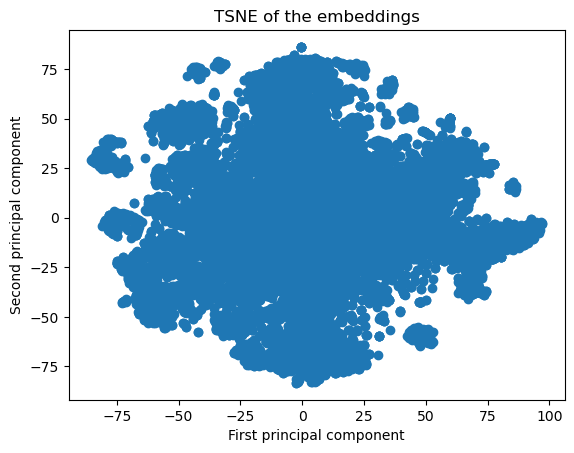

In [3]:
# reduce dimensionality

embeddings_reduced = PCA(embeddings, 2)

# plot the embeddings
plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1])
plt.title('PCA of the embeddings')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

embeddings_reduced = TSNE(embeddings, 2)

# plot the embeddings
plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1])
plt.title('TSNE of the embeddings')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

# embeddings_reduced = MDS(embeddings, 2)

# # plot the embeddings
# plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1])
# plt.title('MDS of the embeddings')
# plt.xlabel('First principal component')
# plt.ylabel('Second principal component')
# plt.show()

# embeddings_reduced = Isomap(embeddings, 2)

# # plot the embeddings
# plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1])
# plt.title('Isomap of the embeddings')
# plt.xlabel('First principal component')
# plt.ylabel('Second principal component')
# plt.show()

In [4]:
verticesInGraph = verticesFromGraph()

data = dataLoader()

data.dropna(inplace=True)

# consider only the vertices that are in the graph
data = data[data[0].isin(verticesInGraph['subreddit'])]

embeddings = data.iloc[:, 1:].values

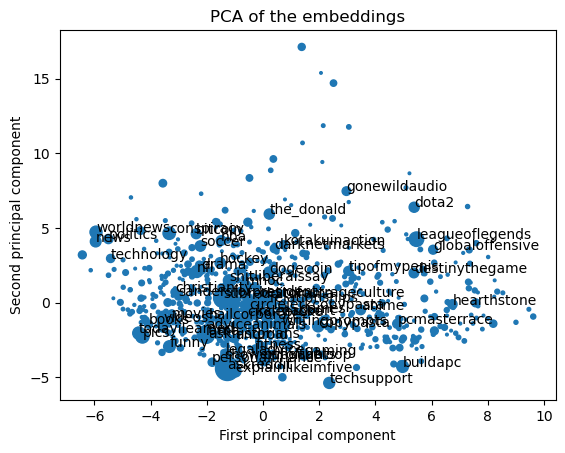

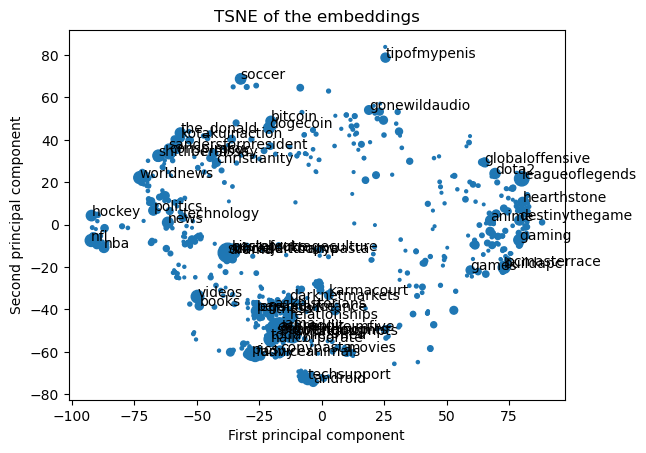

In [5]:
# reduce dimensionality

embeddings_reduced = PCA(embeddings, 2)

name_with_embeddings = pd.DataFrame(data=embeddings_reduced, index=data[0].values)

vertices_with_embeddings = pd.merge(verticesInGraph, name_with_embeddings, left_on='subreddit', right_index=True)

# remove subreddits with number of occurences less than 1
vertices_with_embeddings = vertices_with_embeddings[vertices_with_embeddings['count'] > 100]

PCA_2d = vertices_with_embeddings

# plot the embeddings with size of the vertex proportional to its count and add the name of the subreddit

plt.scatter(vertices_with_embeddings[0], vertices_with_embeddings[1], s=vertices_with_embeddings['count']/30)
for i, txt in enumerate(vertices_with_embeddings['subreddit']):
    if vertices_with_embeddings['count'].iloc[i] > 1000:
        plt.annotate(txt, (vertices_with_embeddings[0].iloc[i], vertices_with_embeddings[1].iloc[i]))
plt.title('PCA of the embeddings')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

embeddings_reduced = TSNE(embeddings, 2)

name_with_embeddings = pd.DataFrame(data=embeddings_reduced, index=data[0].values)

vertices_with_embeddings = pd.merge(verticesInGraph, name_with_embeddings, left_on='subreddit', right_index=True)

# remove subreddits with number of occurences less than 1
vertices_with_embeddings = vertices_with_embeddings[vertices_with_embeddings['count'] > 100]

TSNE_2d = vertices_with_embeddings

# plot the embeddings
plt.scatter(vertices_with_embeddings[0], vertices_with_embeddings[1], s=vertices_with_embeddings['count']/30)
for i, txt in enumerate(vertices_with_embeddings['subreddit']):
    if vertices_with_embeddings['count'].iloc[i] > 1000:
        plt.annotate(txt, (vertices_with_embeddings[0].iloc[i], vertices_with_embeddings[1].iloc[i]))
plt.title('TSNE of the embeddings')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

# embeddings_reduced = MDS(embeddings, 2)

# name_with_embeddings = pd.DataFrame(data=embeddings_reduced, index=data[0].values)

# vertices_with_embeddings = pd.merge(verticesInGraph, name_with_embeddings, left_on='subreddit', right_index=True)

# # remove subreddits with number of occurences less than 1
# vertices_with_embeddings = vertices_with_embeddings[vertices_with_embeddings['count'] > 100]

# # plot the embeddings
# plt.scatter(vertices_with_embeddings[0], vertices_with_embeddings[1], s=vertices_with_embeddings['count']/30)
# plt.title('MDS of the embeddings')
# plt.xlabel('First principal component')
# plt.ylabel('Second principal component')
# plt.show()

# embeddings_reduced = Isomap(embeddings, 2)

# name_with_embeddings = pd.DataFrame(data=embeddings_reduced, index=data[0].values)

# vertices_with_embeddings = pd.merge(verticesInGraph, name_with_embeddings, left_on='subreddit', right_index=True)

# # remove subreddits with number of occurences less than 1
# vertices_with_embeddings = vertices_with_embeddings[vertices_with_embeddings['count'] > 100]

# # plot the embeddings
# plt.scatter(vertices_with_embeddings[0], vertices_with_embeddings[1], s=vertices_with_embeddings['count']/30)
# plt.title('Isomap of the embeddings')
# plt.xlabel('First principal component')
# plt.ylabel('Second principal component')
# plt.show()


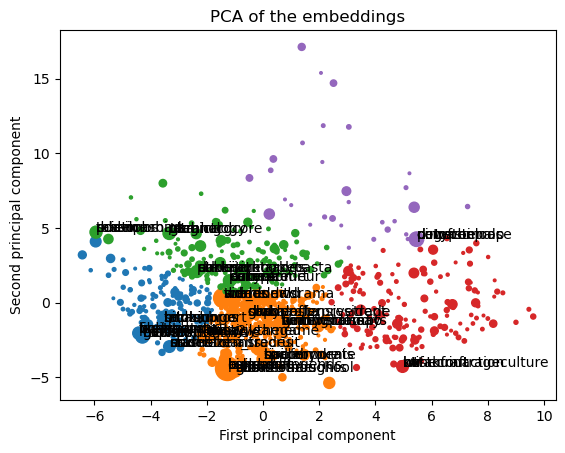

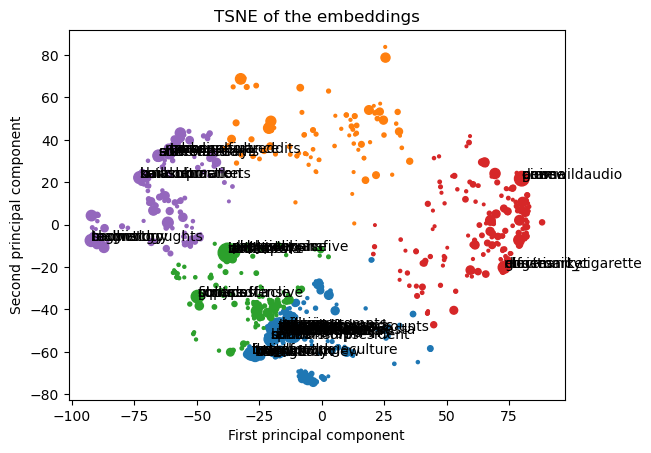

In [6]:
# clustering of the embeddings

from sklearn.cluster import KMeans
# take last two columns of the dataframe

XY = PCA_2d[[0, 1]].values
clusters = KMeans(n_clusters=5).fit(XY)

PCA_2d['cluster'] = clusters.labels_

# plot every cluster with a different color

for i in range(5):
    plt.scatter(PCA_2d[0][PCA_2d['cluster'] == i], PCA_2d[1][PCA_2d['cluster'] == i], s=PCA_2d['count'][PCA_2d['cluster'] == i]/30)
    for j, txt in enumerate(PCA_2d['subreddit'][PCA_2d['cluster'] == i]):
        if PCA_2d['count'].iloc[j] > 2000:
            plt.annotate(txt, (PCA_2d[0].iloc[j], PCA_2d[1].iloc[j]))
plt.title('PCA of the embeddings')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

XY = TSNE_2d[[0, 1]].values

clusters = KMeans(n_clusters=5).fit(XY)

TSNE_2d['cluster'] = clusters.labels_

# plot every cluster with a different color

for i in range(5):
    plt.scatter(TSNE_2d[0][TSNE_2d['cluster'] == i], TSNE_2d[1][TSNE_2d['cluster'] == i], s=TSNE_2d['count'][TSNE_2d['cluster'] == i]/30)
    for j, txt in enumerate(TSNE_2d['subreddit'][TSNE_2d['cluster'] == i]):
        if TSNE_2d['count'].iloc[j] > 2000:
            plt.annotate(txt, (TSNE_2d[0].iloc[j], TSNE_2d[1].iloc[j]))
plt.title('TSNE of the embeddings')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()


In [7]:
# plot all the edges from given subreddit to other subreddits

subreddit = 'copypasta' 

data = edgesFromGraph()

data.dropna(inplace=True)

data = data[data['SOURCE_SUBREDDIT'].isin(verticesInGraph['subreddit'])]

data = data[data['SOURCE_SUBREDDIT'] == subreddit]

edges = data['TARGET_SUBREDDIT'].values

# change it into unique but weighted edges

edges = np.unique(edges, return_counts=True)

edges = pd.DataFrame(data={'subreddit': edges[0], 'count': edges[1]})
edges

,subreddit,count
0,2007scape,6
1,2016protest,1
2,2meirl4meirl,1
3,4chan,38
4,4panelcringe,1
...,...,...
631,youdontsurf,2
632,youshouldknow,1
633,youtube,1
634,youtubecomments,1


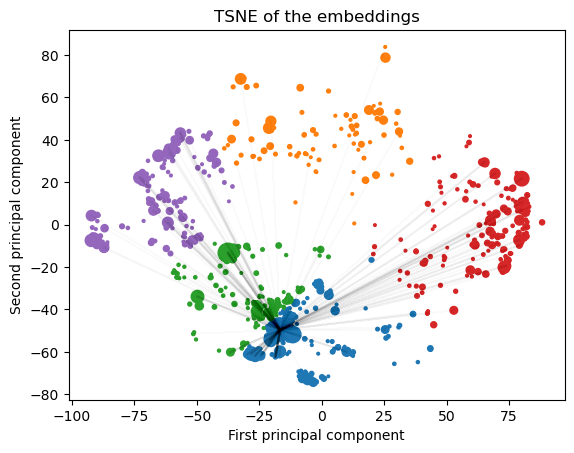

In [8]:
#plot clustered vertices with edges

# plot the embeddings with size of the vertex proportional to its count and add the name of the subreddit

for i in range(5):
    plt.scatter(TSNE_2d[0][TSNE_2d['cluster'] == i], TSNE_2d[1][TSNE_2d['cluster'] == i], s=TSNE_2d['count'][TSNE_2d['cluster'] == i]/30)
    # plot the edges
    
    for j in range(len(edges)):
        if edges['subreddit'].iloc[j] in TSNE_2d['subreddit'].values:
            plt.plot([TSNE_2d[0][TSNE_2d['subreddit'] == subreddit].values[0], TSNE_2d[0][TSNE_2d['subreddit'] == edges['subreddit'].iloc[j]].values[0]], [TSNE_2d[1][TSNE_2d['subreddit'] == 'askreddit'].values[0], TSNE_2d[1][TSNE_2d['subreddit'] == edges['subreddit'].iloc[j]].values[0]], color='black', alpha=edges['count'].iloc[j]/(7*edges['count'].max()))
plt.title('TSNE of the embeddings')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()


In [9]:
# save the 2d embeddings to csv

PCA_2d.to_csv('PCA_2d.csv')

TSNE_2d.to_csv('TSNE_2d.csv')